# Chapter-4 Feature Engineering and Selection

# Feature Engineering on Numeric Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

%matplotlib inline
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

## Values

In [4]:
poke_df = pd.read_csv("Pokemon.csv", encoding='utf-8')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [5]:
poke_df[['HP', 'Attack', 'Defense']].head()

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


In [6]:
poke_df[['HP', 'Attack', 'Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


## Counts

In [8]:
popsong_df = pd.read_csv("Song_views.csv", encoding='utf-8')
popsong_df.head(10)

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0


## Binarization

In [9]:
watched = np.array(popsong_df['listen_count'])
watched[watched >= 1] = 1
popsong_df['watched'] = watched

In [8]:
#Binarizing song counts
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=0.9)
pd_watched = bn.transform([popsong_df['listen_count']])[0]
popsong_df['pd_watched'] = pd_watched
popsong_df.head(11)

,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


## Rounding

In [11]:
items_popularity = pd.read_csv("item_popularity.csv", encoding='utf-8')

In [12]:
# rounding off percentages
items_popularity['popularity_scale_10'] = np.array(np.round((items_popularity['pop_percent'] * 10)), dtype='int')
items_popularity['popularity_scale_100'] = np.array(np.round((items_popularity['pop_percent'] * 100)), dtype='int')
items_popularity

,item_id,pop_percent,popularity_scale_10,popularity_scale_100
0,it_01345,0.98324,10,98
1,it_03431,0.56123,6,56
2,it_04572,0.12098,1,12
3,it_98021,0.35476,4,35
4,it_01298,0.92101,9,92
5,it_90120,0.81212,8,81
6,it_10123,0.56502,6,57


## Interactions

In [13]:
atk_def = poke_df[['Attack', 'Defense']]
atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [14]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

In [15]:
pd.DataFrame(pf.powers_, columns=['Attack_degree', 'Defense_degree'])

,Attack_degree,Defense_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [16]:
intr_features = pd.DataFrame(res,
                             columns=['Attack', 'Defense',
                                      'Attack^2', 'Attack x Defense', 'Defense^2'])

In [17]:
intr_features.head(5)

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0


In [18]:
new_df = pd.DataFrame([[95, 75],[121, 120], [77, 60]],
                      columns=['Attack', 'Defense'])
new_df

,Attack,Defense
0,95,75
1,121,120
2,77,60


In [19]:
new_res = pf.transform(new_df)
new_intr_features = pd.DataFrame(new_res,
                                 columns=['Attack', 'Defense',
                                          'Attack^2', 'Attack x Defense', 'Defense^2'])
new_intr_features

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,95.0,75.0,9025.0,7125.0,5625.0
1,121.0,120.0,14641.0,14520.0,14400.0
2,77.0,60.0,5929.0,4620.0,3600.0


## Binning

In [21]:
fcc_survey_df = pd.read_csv("fcc_2016_coder_survey_subset.csv",encoding='utf-8')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


## Fixed-Width Binning

Text(0, 0.5, 'Frequency')

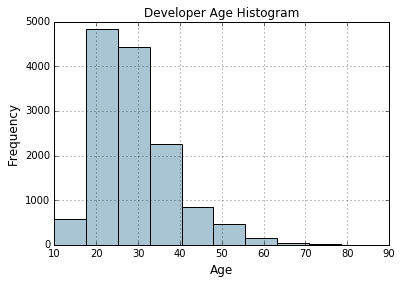

In [22]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [23]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


In [24]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]
fcc_survey_df['Age_bin_custom_range'] = pd.cut(np.array(fcc_survey_df['Age']), bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(np.array(fcc_survey_df['Age']), bins=bin_ranges, labels=bin_names)
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round', 'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


## Adaptive Binning

+ Quantile based binning is a good strategy to use for adaptive binning. 
+ Quantiles are specific values or cut-points which help in partitioning the continuous valued distribution of a specific numeric field into discrete contiguous bins or intervals.

In [25]:
fcc_survey_df[['ID.x', 'Age', 'Income']].iloc[4:9]

,ID.x,Age,Income
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0
7,6dff182db452487f07a47596f314bddc,35.0,40000.0
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0


Text(0, 0.5, 'Frequency')

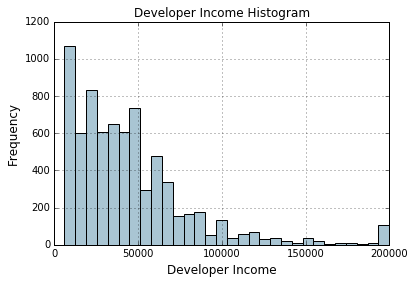

In [23]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [26]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0, 0.5, 'Frequency')

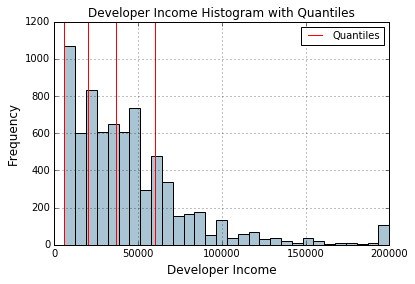

In [27]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [28]:
#Quantile based bin ranges and labels for developer incomes
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(fcc_survey_df['Income'],
q=quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(fcc_survey_df['Income'],
q=quantile_list,
labels=quantile_labels)
fcc_survey_df[['ID.x', 'Age', 'Income',
'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


## Statistical Transformations
+ In this section, we will look at the Log transform as well as the Box-Cox transform.
+ Both of these transform functions belong to the Power Transform family of functions. 
+ These functions are typically used to create monotonic data transformations, but their main significance is that they help in stabilizing variance, adhering closely to the normal distribution and making the data independent of the mean based on its distribution.

## Log Transform

In [29]:
fcc_survey_df['Income_log'] = np.log((1+ fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


Text(11.5, 450, '$\\mu$=10.43')

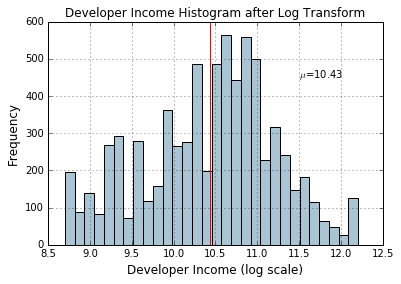

In [30]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)
fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
#Histogram depicting developer income distribution after log transform
ax.set_title('Developer Income Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

## Box-Cox Transform

In [31]:
# get optimal lambda value from non null income values
income = np.array(fcc_survey_df['Income'])
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.11799123945557663


In [32]:
fcc_survey_df['Income_boxcox_lambda_0'] = spstats.boxcox((1+fcc_survey_df['Income']), lmbda=0)
fcc_survey_df['Income_boxcox_lambda_opt'] = spstats.boxcox(fcc_survey_df['Income'], lmbda=opt_lambda)
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log', 'Income_boxcox_lambda_0', 'Income_boxcox_lambda_opt']].iloc[4:9]

C:\Program Files (x86)\Anaconda\lib\site-packages\scipy\stats\morestats.py:1029: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


,ID.x,Age,Income,Income_log,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,8.699681,15.180668
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660,10.596660,21.115342
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522,10.373522,20.346420
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660,10.596660,21.115342
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794,11.289794,23.637131


Text(24, 450, '$\\mu$=20.65')

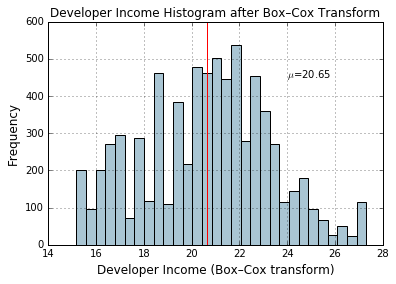

In [33]:
income_boxcox_mean = np.round(np.mean(fcc_survey_df['Income_boxcox_lambda_opt']), 2)
fig, ax = plt.subplots()
fcc_survey_df['Income_boxcox_lambda_opt'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_boxcox_mean, color='r')
#Histogram depicting developer income distribution after box-cox transform (λ = λoptimal)
ax.set_title('Developer Income Histogram after Box–Cox Transform', fontsize=12)
ax.set_xlabel('Developer Income (Box–Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(24, 450, r'$\mu$='+str(income_boxcox_mean), fontsize=10)

# Feature Engineering on Categorical Data
+ Category or class labels can be text or numeric in nature. Usually there are two types of categorical variables—nominal and ordinal.

In [34]:
import pandas as pd
import numpy as np

## Transforming Nominal Features

In [36]:
vg_df = pd.read_csv("vgsales.csv", encoding='utf-8')
vg_df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']].iloc[1:7]

,Name,Platform,Year,Genre,Publisher
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,Tetris,GB,1989.0,Puzzle,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo


In [37]:
genres = np.unique(vg_df['Genre'])
genres

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
genre_labels = gle.fit_transform(vg_df['Genre'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
genre_mappings

{0: 'Action',
 1: 'Adventure',
 2: 'Fighting',
 3: 'Misc',
 4: 'Platform',
 5: 'Puzzle',
 6: 'Racing',
 7: 'Role-Playing',
 8: 'Shooter',
 9: 'Simulation',
 10: 'Sports',
 11: 'Strategy'}

In [39]:
vg_df['GenreLabel'] = genre_labels
vg_df[['Name', 'Platform', 'Year', 'Genre', 'GenreLabel']].iloc[1:7]

,Name,Platform,Year,Genre,GenreLabel
1,Super Mario Bros.,NES,1985.0,Platform,4
2,Mario Kart Wii,Wii,2008.0,Racing,6
3,Wii Sports Resort,Wii,2009.0,Sports,10
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,7
5,Tetris,GB,1989.0,Puzzle,5
6,New Super Mario Bros.,DS,2006.0,Platform,4


## Transforming Ordinal Features

In [40]:
poke_df = pd.read_csv("Pokemon.csv", encoding='utf-8')

In [41]:
poke_df = poke_df.sample(random_state=1, frac=1).reset_index(drop=True)

In [42]:
np.unique(poke_df['Generation'])

array(['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'], dtype=object)

In [43]:
gen_ord_map = {'Gen 1': 1, 'Gen 2': 2, 'Gen 3': 3,
               'Gen 4': 4, 'Gen 5': 5, 'Gen 6': 6}
poke_df['GenerationLabel'] = poke_df['Generation'].map(gen_ord_map)
poke_df[['Name', 'Generation', 'GenerationLabel']].iloc[4:10]

,Name,Generation,GenerationLabel
4,Octillery,Gen 2,2
5,Helioptile,Gen 6,6
6,Dialga,Gen 4,4
7,DeoxysDefense Forme,Gen 3,3
8,Rapidash,Gen 1,1
9,Swanna,Gen 5,5


# Encoding Categorical Features
## One Hot Encoding Scheme
+ Considering we have numeric representation of any categorical feature with m labels, the one hot encoding scheme, encodes or transforms the feature into m binary features, which can only contain a value of 1 or 0.

In [44]:
poke_df[['Name', 'Generation', 'Legendary']].iloc[4:10]

,Name,Generation,Legendary
4,Octillery,Gen 2,False
5,Helioptile,Gen 6,False
6,Dialga,Gen 4,True
7,DeoxysDefense Forme,Gen 3,True
8,Rapidash,Gen 1,False
9,Swanna,Gen 5,False


In [45]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# transform and map pokemon generations
gen_le = LabelEncoder()
gen_labels = gen_le.fit_transform(poke_df['Generation'])
poke_df['Gen_Label'] = gen_labels

# transform and map pokemon legendary status
leg_le = LabelEncoder()
leg_labels = leg_le.fit_transform(poke_df['Legendary'])
poke_df['Lgnd_Label'] = leg_labels

poke_df_sub = poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary', 'Lgnd_Label']]
poke_df_sub.iloc[4:10]

,Name,Generation,Gen_Label,Legendary,Lgnd_Label
4,Octillery,Gen 2,1,False,0
5,Helioptile,Gen 6,5,False,0
6,Dialga,Gen 4,3,True,1
7,DeoxysDefense Forme,Gen 3,2,True,1
8,Rapidash,Gen 1,0,False,0
9,Swanna,Gen 5,4,False,0


In [46]:
# Feature set depicting one hot encoded features for Pokémon generation and legendary status
# encode generation labels using one-hot encoding scheme
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(poke_df[['Gen_Label']]).toarray()
gen_feature_labels = list(gen_le.classes_)
gen_features = pd.DataFrame(gen_feature_arr, columns=gen_feature_labels)

# encode legendary status labels using one-hot encoding scheme
leg_ohe = OneHotEncoder()
leg_feature_arr = leg_ohe.fit_transform(poke_df[['Lgnd_Label']]).toarray()
leg_feature_labels = ['Legendary_'+str(cls_label) for cls_label in leg_le.classes_]
leg_features = pd.DataFrame(leg_feature_arr, columns=leg_feature_labels)
poke_df_ohe = pd.concat([poke_df_sub, gen_features, leg_features], axis=1)
columns = sum([['Name', 'Generation', 'Gen_Label'],gen_feature_labels,
               ['Legendary', 'Lgnd_Label'],leg_feature_labels], [])
poke_df_ohe[columns].iloc[4:10]

C:\Users\INTEL\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\INTEL\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

,Name,Generation,Gen_Label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6,Legendary,Lgnd_Label,Legendary_False,Legendary_True
4,Octillery,Gen 2,1,0.0,1.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0
5,Helioptile,Gen 6,5,0.0,0.0,0.0,0.0,0.0,1.0,False,0,1.0,0.0
6,Dialga,Gen 4,3,0.0,0.0,0.0,1.0,0.0,0.0,True,1,0.0,1.0
7,DeoxysDefense Forme,Gen 3,2,0.0,0.0,1.0,0.0,0.0,0.0,True,1,0.0,1.0
8,Rapidash,Gen 1,0,1.0,0.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0
9,Swanna,Gen 5,4,0.0,0.0,0.0,0.0,1.0,0.0,False,0,1.0,0.0


In [47]:
new_poke_df = pd.DataFrame([['PikaZoom', 'Gen 3', True],
                            ['CharMyToast', 'Gen 4', False]],
                           columns=['Name', 'Generation', 'Legendary'])
new_poke_df

,Name,Generation,Legendary
0,PikaZoom,Gen 3,True
1,CharMyToast,Gen 4,False


In [48]:
new_gen_labels = gen_le.transform(new_poke_df['Generation'])
new_poke_df['Gen_Label'] = new_gen_labels
new_leg_labels = leg_le.transform(new_poke_df['Legendary'])
new_poke_df['Lgnd_Label'] = new_leg_labels
new_poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary', 'Lgnd_Label']]

,Name,Generation,Gen_Label,Legendary,Lgnd_Label
0,PikaZoom,Gen 3,2,True,1
1,CharMyToast,Gen 4,3,False,0


In [49]:
# Feature set depicting one hot encoded features for new pokemon data points
new_gen_feature_arr = gen_ohe.transform(new_poke_df[['Gen_Label']]).toarray()
new_gen_features = pd.DataFrame(new_gen_feature_arr, columns=gen_feature_labels)

new_leg_feature_arr = leg_ohe.transform(new_poke_df[['Lgnd_Label']]).toarray()
new_leg_features = pd.DataFrame(new_leg_feature_arr, columns=leg_feature_labels)

new_poke_ohe = pd.concat([new_poke_df, new_gen_features, new_leg_features], axis=1)
columns = sum([['Name', 'Generation', 'Gen_Label'], gen_feature_labels,
['Legendary', 'Lgnd_Label'], leg_feature_labels], [])
new_poke_ohe[columns]

,Name,Generation,Gen_Label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6,Legendary,Lgnd_Label,Legendary_False,Legendary_True
0,PikaZoom,Gen 3,2,0.0,0.0,1.0,0.0,0.0,0.0,True,1,0.0,1.0
1,CharMyToast,Gen 4,3,0.0,0.0,0.0,1.0,0.0,0.0,False,0,1.0,0.0


In [51]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
pd.concat([poke_df[['Name', 'Generation']], gen_onehot_features], axis=1).iloc[4:10]

,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,0,1,0,0,0,0
5,Helioptile,Gen 6,0,0,0,0,0,1
6,Dialga,Gen 4,0,0,0,1,0,0
7,DeoxysDefense Forme,Gen 3,0,0,1,0,0,0
8,Rapidash,Gen 1,1,0,0,0,0,0
9,Swanna,Gen 5,0,0,0,0,1,0


## Dummy Coding Scheme

In [52]:
gen_dummy_features = pd.get_dummies(poke_df['Generation'], drop_first=True)
pd.concat([poke_df[['Name', 'Generation']], gen_dummy_features], axis=1).iloc[4:10]

,Name,Generation,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,1,0,0,0,0
5,Helioptile,Gen 6,0,0,0,0,1
6,Dialga,Gen 4,0,0,1,0,0
7,DeoxysDefense Forme,Gen 3,0,1,0,0,0
8,Rapidash,Gen 1,0,0,0,0,0
9,Swanna,Gen 5,0,0,0,1,0


In [53]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
gen_dummy_features = gen_onehot_features.iloc[:,:-1]
pd.concat([poke_df[['Name', 'Generation']], gen_dummy_features], axis=1).iloc[4:10]

,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5
4,Octillery,Gen 2,0,1,0,0,0
5,Helioptile,Gen 6,0,0,0,0,0
6,Dialga,Gen 4,0,0,0,1,0
7,DeoxysDefense Forme,Gen 3,0,0,1,0,0
8,Rapidash,Gen 1,1,0,0,0,0
9,Swanna,Gen 5,0,0,0,0,1


## Effect Coding Scheme
+ The effect coding scheme is very similar to the dummy coding scheme in most aspects. 
+ However, the encoded features or feature vector, for the category values that represent all 0s in the dummy coding scheme, is replaced by -1s in the effect coding scheme.

In [54]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
gen_effect_features = gen_onehot_features.iloc[:,:-1]
gen_effect_features.loc[np.all(gen_effect_features == 0, axis=1)] = -1.
pd.concat([poke_df[['Name', 'Generation']], gen_effect_features], axis=1).iloc[4:10]

C:\Users\INTEL\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5
4,Octillery,Gen 2,0.0,1.0,0.0,0.0,0.0
5,Helioptile,Gen 6,-1.0,-1.0,-1.0,-1.0,-1.0
6,Dialga,Gen 4,0.0,0.0,0.0,1.0,0.0
7,DeoxysDefense Forme,Gen 3,0.0,0.0,1.0,0.0,0.0
8,Rapidash,Gen 1,1.0,0.0,0.0,0.0,0.0
9,Swanna,Gen 5,0.0,0.0,0.0,0.0,1.0


# Bin-Counting Scheme

+ The bin-counting scheme is useful for dealing with categorical variables with many categories.
## Feature Hashing Scheme

+ The feature hashing scheme is another useful feature engineering scheme for dealing with large scale categorical features.

In [55]:
unique_genres = np.unique(vg_df[['Genre']])
print("Total game genres:", len(unique_genres))
print(unique_genres)

Total game genres: 12
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


In [56]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(vg_df['Genre'])
hashed_features = hashed_features.toarray()
pd.concat([vg_df[['Name', 'Genre']], pd.DataFrame(hashed_features)], axis=1).iloc[1:7]

,Name,Genre,0,1,2,3,4,5
1,Super Mario Bros.,Platform,0.0,2.0,2.0,-1.0,1.0,0.0
2,Mario Kart Wii,Racing,-1.0,0.0,0.0,0.0,0.0,-1.0
3,Wii Sports Resort,Sports,-2.0,2.0,0.0,-2.0,0.0,0.0
4,Pokemon Red/Pokemon Blue,Role-Playing,-1.0,1.0,2.0,0.0,1.0,-1.0
5,Tetris,Puzzle,0.0,1.0,1.0,-2.0,1.0,-1.0
6,New Super Mario Bros.,Platform,0.0,2.0,2.0,-1.0,1.0,0.0


# Feature Engineering on Text Data
+ Pre-processing and normalizing text
+ Feature extraction and engineering

In [1]:
import pandas as pd
import numpy as np
import re
import nltk

In [2]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!']
labels = ['weather', 'weather', 'animals', 'animals', 'weather', 'animals']
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus,
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,The brown fox is quick and the blue dog is lazy!,animals
4,The sky is very blue and the sky is very beaut...,weather
5,The dog is lazy but the brown fox is quick!,animals


## Text Pre-Processing
+ Following are some of the popular pre-processing techniques.
+ Text tokenization and lower casing
+ Removing special characters
+ Contraction expansion
+ Removing stopwords
+ Correcting spellings
+ Stemming
+ Lemmatization

In [3]:
import numpy as np
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc
normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful .', 'love blue beautiful sky !',
       'quick brown fox jumps lazy dog .',
       'brown fox quick blue dog lazy !', 'sky blue sky beautiful today',
       'dog lazy brown fox quick !'], dtype='<U32')

## Bag of Words Model

+ This is perhaps one of the simplest yet effective schemes of vectorizing features from unstructured text.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1],
       [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0]], dtype=int64)

In [9]:
vocab = cv.get_feature_names()
pd.DataFrame(cv_matrix, columns=vocab)

,beautiful,blue,brown,dog,fox,jumps,lazy,love,quick,sky,today
0,1,1,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,1,0,1,0
2,0,0,1,1,1,1,1,0,1,0,0
3,0,1,1,1,1,0,1,0,1,0,0
4,1,1,0,0,0,0,0,0,0,2,1
5,0,0,1,1,1,0,1,0,1,0,0


## Bag of N-Grams Model
+ An n-gram is basically a collection of word tokens from a text document such that these tokens are contiguous and occur in a sequence. 
+ Bi-grams indicate n-grams of order 2 (two words), Tri-grams indicate n-grams of order 3 (three words), and so on.

In [10]:
# bi-gram feature vectors for our corpus based on bag of n-grams model
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,brown fox,dog lazy,fox jumps,fox quick,jumps lazy,lazy brown,lazy dog,love blue,quick blue,quick brown,sky beautiful,sky blue
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
3,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
5,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0


## TF-IDF Model
+ The TF-IDF model tries to combat this issue by using a scaling or normalizing factor in its computation. 
+ TF-IDF stands for Term Frequency-Inverse Document Frequency, which uses a combination of two metrics in its computation, namely: term frequency (tf) and inverse document frequency (idf ).

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,beautiful,blue,brown,dog,fox,jumps,lazy,love,quick,sky,today
0,0.60,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00
1,0.46,0.39,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.46,0.00
2,0.00,0.00,0.38,0.38,0.38,0.54,0.38,0.00,0.38,0.00,0.00
3,0.00,0.36,0.42,0.42,0.42,0.00,0.42,0.00,0.42,0.00,0.00
4,0.36,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.52
5,0.00,0.00,0.45,0.45,0.45,0.00,0.45,0.00,0.45,0.00,0.00


## Document Similarity

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5
0,1.000000,0.753128,0.000000,0.185447,0.807539,0.000000
1,0.753128,1.000000,0.000000,0.139665,0.608181,0.000000
2,0.000000,0.000000,1.000000,0.784362,0.000000,0.839987
3,0.185447,0.139665,0.784362,1.000000,0.109653,0.933779
4,0.807539,0.608181,0.000000,0.109653,1.000000,0.000000
5,0.000000,0.000000,0.839987,0.933779,0.000000,1.000000


In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit_transform(similarity_df)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,0
1,Love this blue and beautiful sky!,weather,0
2,The quick brown fox jumps over the lazy dog.,animals,1
3,The brown fox is quick and the blue dog is lazy!,animals,1
4,The sky is very blue and the sky is very beaut...,weather,0
5,The dog is lazy but the brown fox is quick!,animals,1


+ The output obtained clearly shows us that our K-means clustering model has labeled our documents into two clusters with labels 0 and 1.

## Topic Models

In [14]:
from sklearn.decomposition import LatentDirichletAllocation

In [15]:
lda = LatentDirichletAllocation(n_components=2, max_iter=100, random_state=42)
dt_matrix = lda.fit_transform(tv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2'])
features

,T1,T2
0,0.190548,0.809452
1,0.176804,0.823196
2,0.846184,0.153816
3,0.814863,0.185137
4,0.180516,0.819484
5,0.839172,0.160828


In [16]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('brown', 1.7273638692668465), ('dog', 1.7273638692668465), ('fox', 1.7273638692668465), ('lazy', 1.7273638692668465), ('quick', 1.7273638692668465), ('jumps', 1.0328325272484777), ('blue', 0.7731573162915626)]

[('sky', 2.264386643135622), ('beautiful', 1.9068269319456903), ('blue', 1.7996282104933266), ('love', 1.148127242397004), ('today', 1.0068251160429935)]



In [17]:
km = KMeans(n_clusters=2)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,1
1,Love this blue and beautiful sky!,weather,1
2,The quick brown fox jumps over the lazy dog.,animals,0
3,The brown fox is quick and the blue dog is lazy!,animals,0
4,The sky is very blue and the sky is very beaut...,weather,1
5,The dog is lazy but the brown fox is quick!,animals,0


## Word Embeddings

In [18]:
from gensim.models import word2vec

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]

# Set values for various parameters
feature_size = 10    # Word vector dimensionality  
window_context = 10          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count = min_word_count,
                          sample=sample) 

C:\Users\INTEL\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [19]:
w2v_model.wv['sky']

array([ 0.04853825, -0.03287696, -0.03427958,  0.04276194, -0.00408689,
       -0.03438866, -0.02092025,  0.0422763 , -0.01050846, -0.04678918],
      dtype=float32)

In [22]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
   
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [23]:
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


,0,1,2,3,4,5,6,7,8,9
0,0.007801,-0.007350,-0.006385,-0.015737,-0.014581,-0.011186,-0.021449,0.032810,-0.010233,-0.000154
1,0.002610,-0.012782,0.001958,0.007969,0.001529,-0.016431,-0.021304,0.024728,-0.012317,0.001904
2,-0.008504,0.004001,0.000002,0.002295,-0.013307,0.003068,-0.000332,0.003481,0.001930,-0.012983
3,-0.008843,-0.004844,0.003318,0.010373,-0.006229,0.007973,-0.008763,0.008701,0.001872,-0.009958
4,0.026011,-0.020942,-0.012222,-0.000736,-0.014591,-0.031735,-0.012743,0.025330,0.000778,-0.013792
5,-0.008745,0.002589,0.001755,0.019614,-0.007873,0.009896,-0.004165,0.002561,0.007163,-0.014330


In [24]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,0
1,Love this blue and beautiful sky!,weather,0
2,The quick brown fox jumps over the lazy dog.,animals,1
3,The brown fox is quick and the blue dog is lazy!,animals,1
4,The sky is very blue and the sky is very beaut...,weather,0
5,The dog is lazy but the brown fox is quick!,animals,1
